In [1]:
import sys
sys.path.insert(0, "src")

from fetch_ticker_data import download_price_data, fetch_and_save_sector_info
from analyze_ticker import full_analysis
from mdna_extractor import download_and_extract_mdna
from mdna_sentiment_and_returns import extract_sentiment_and_reaction_returns
from backtest_runner import run_backtests, analyze_backtests

In [2]:
tickers = [
    "NVDA", "IBM", "TXN", "BAC", "MA", "JNJ", "LLY", "CAT", "DE", "FDX", "T"
]
start_date = "2013-01-01"

bull_threshold = 3
bear_threshold = 1
wait_weeks = range(0, 11)
hold_weeks = range(1, 11)
initial_balance = 100000
transaction_cost = 0.001

In [3]:
# very computation heavy procedure!!!

download_price_data(tickers, start_date)
fetch_and_save_sector_info(tickers)

# perform an analysis of each ticker (plot prices, returns, etc.)
# for ticker in tickers:
#     full_analysis(ticker)

download_and_extract_mdna(tickers, filing_type="10-Q", after=start_date)
extract_sentiment_and_reaction_returns()

In [4]:
run_backtests(
    bull_threshold,
    bear_threshold,
    wait_weeks,
    hold_weeks,
    initial_balance,
    transaction_cost
)

/Users/adi/PycharmProjects/ContrarianBet/src/backtest_runner.py:200: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: pd.Series({


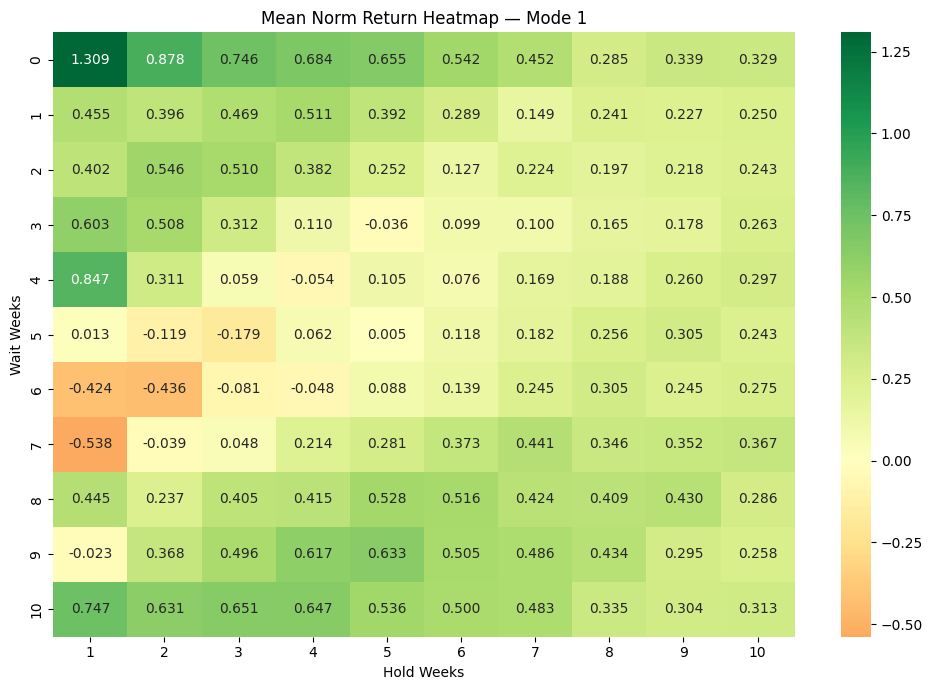

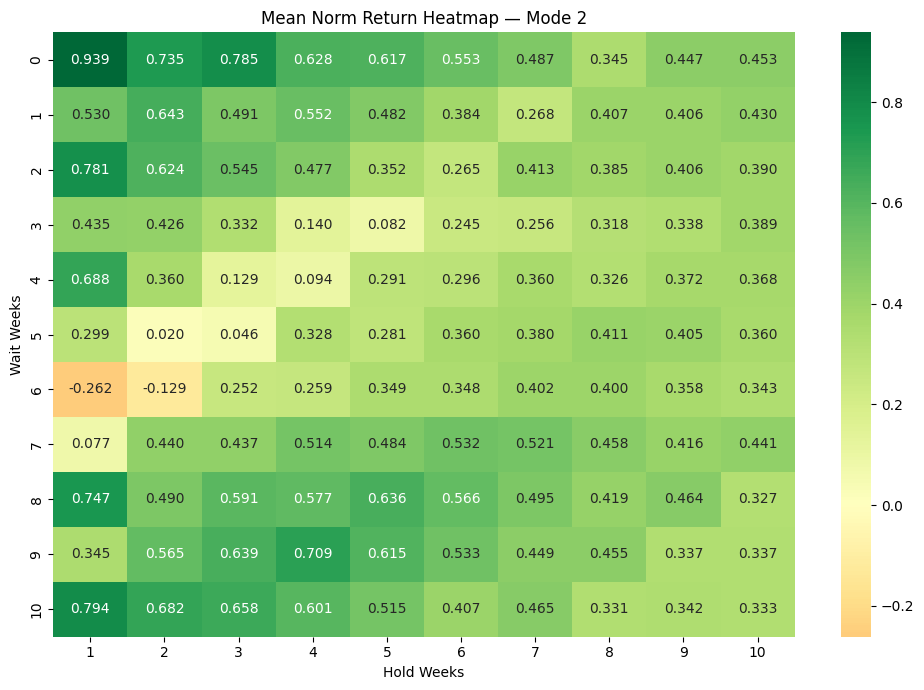

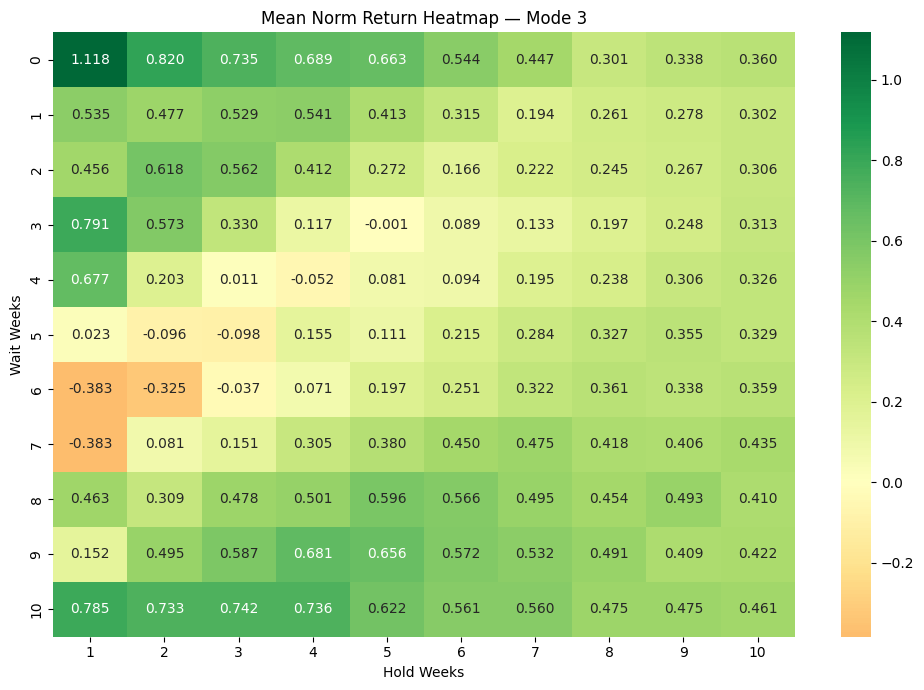

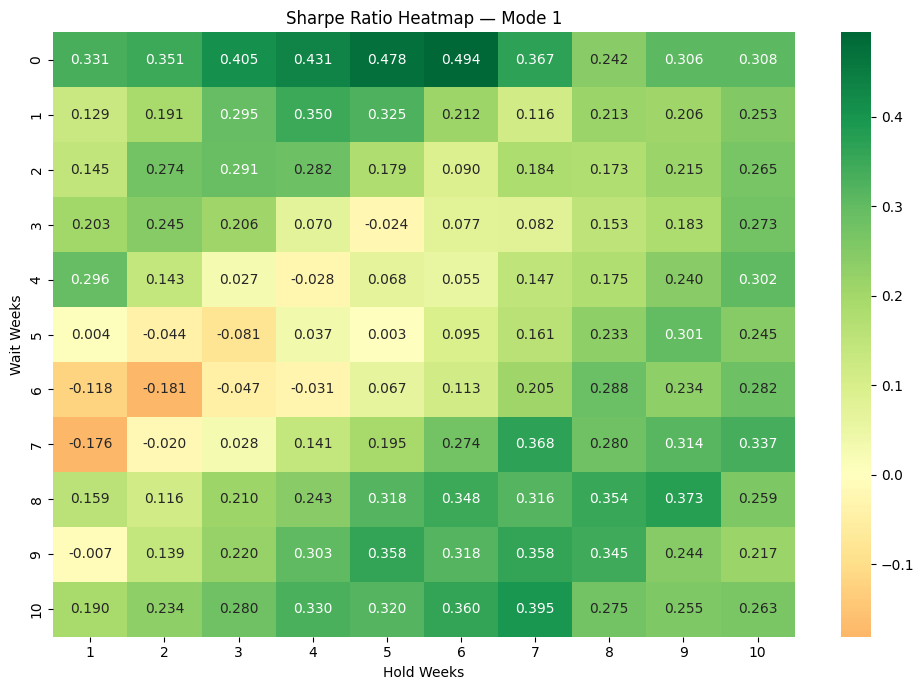

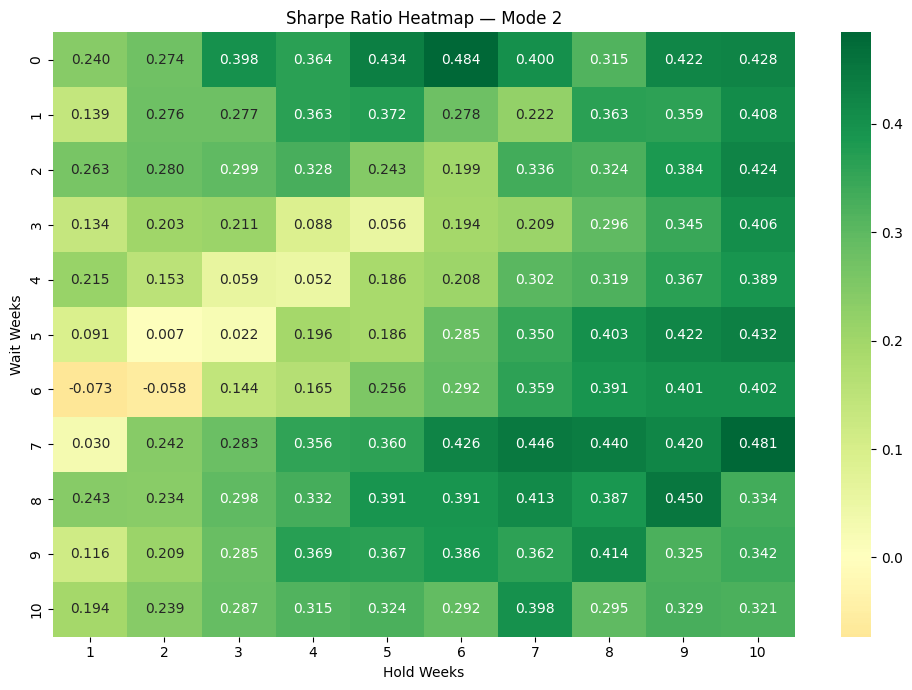

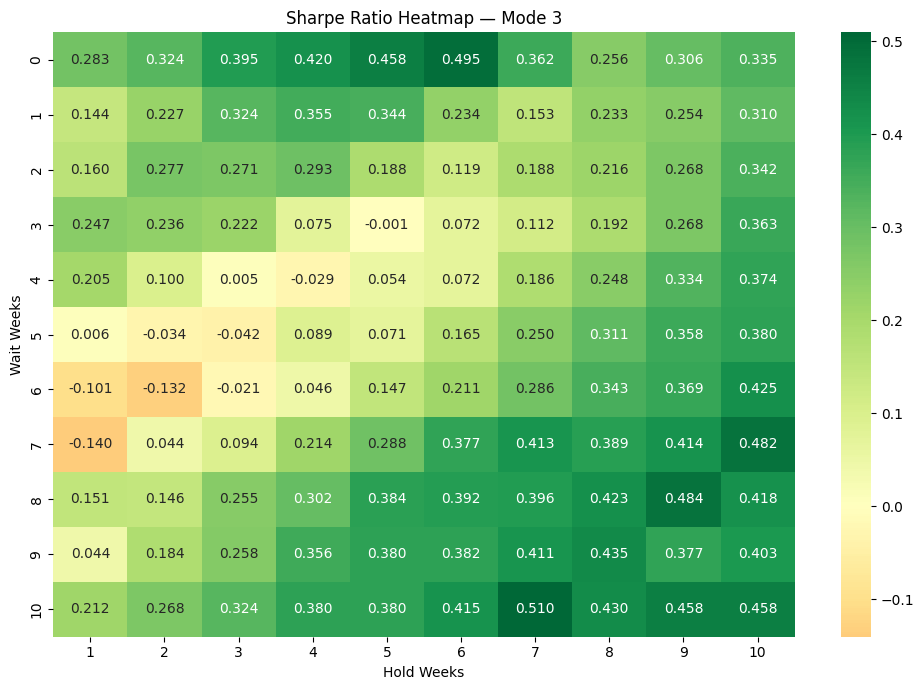

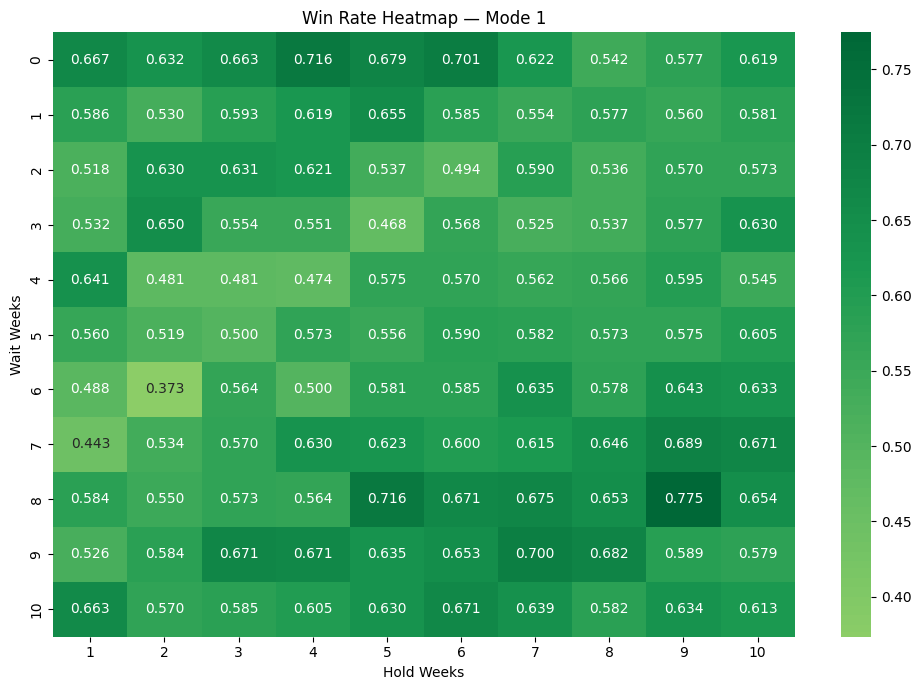

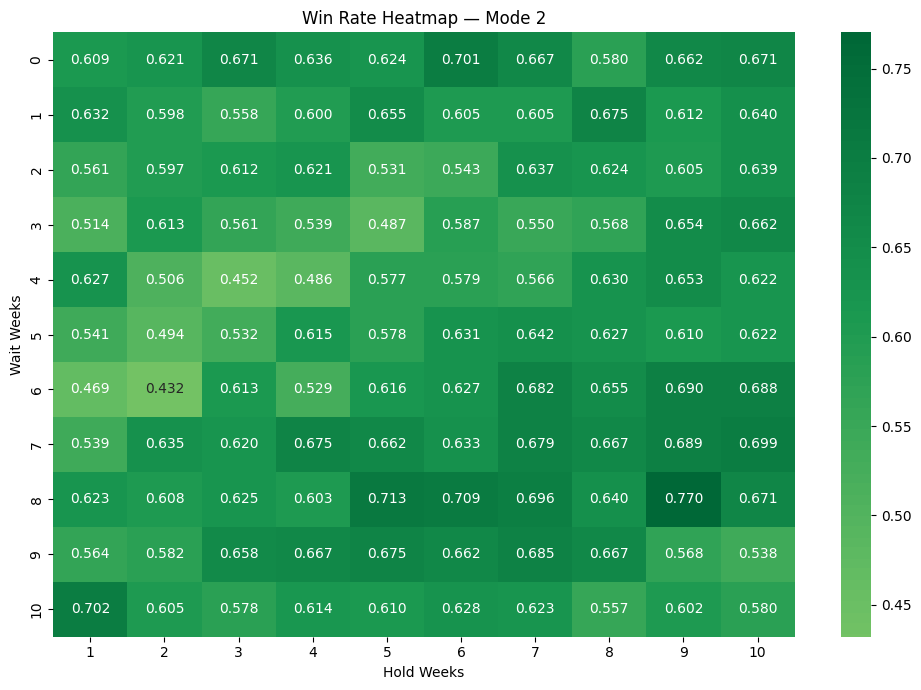

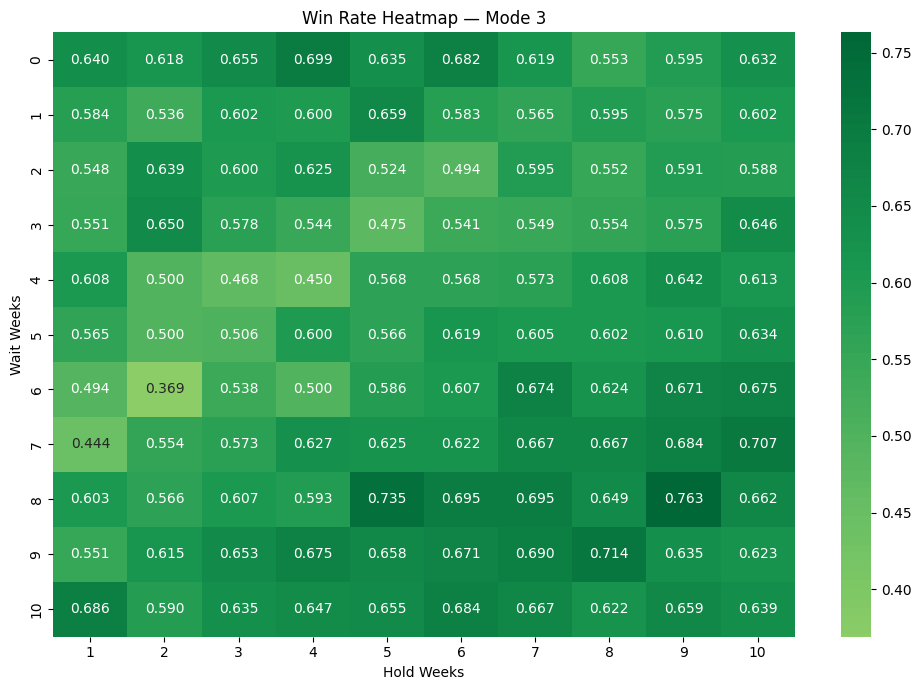

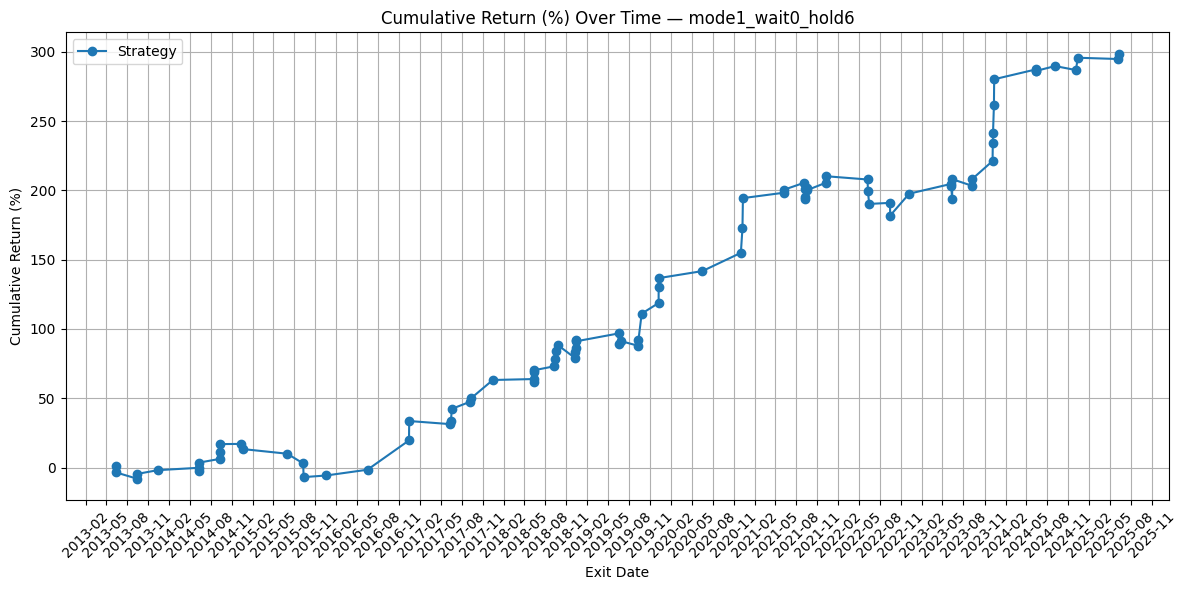

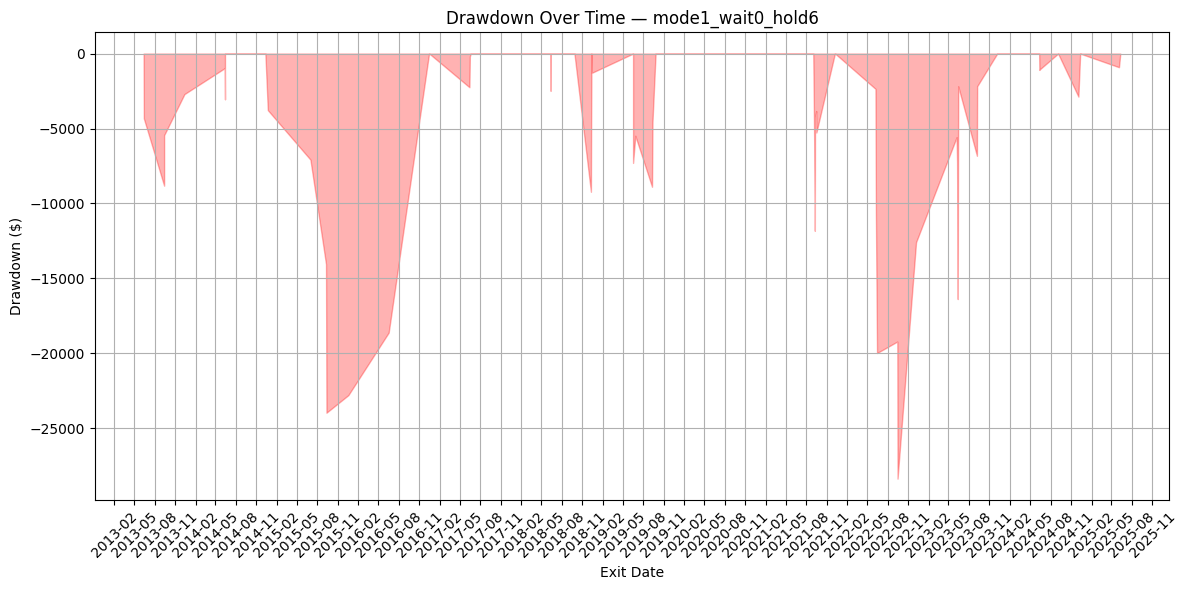

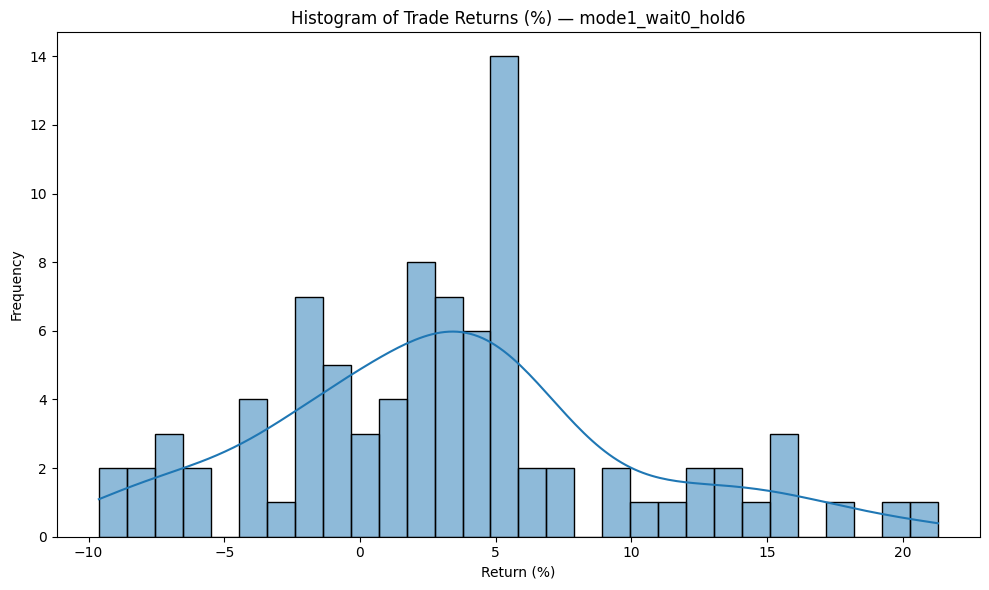

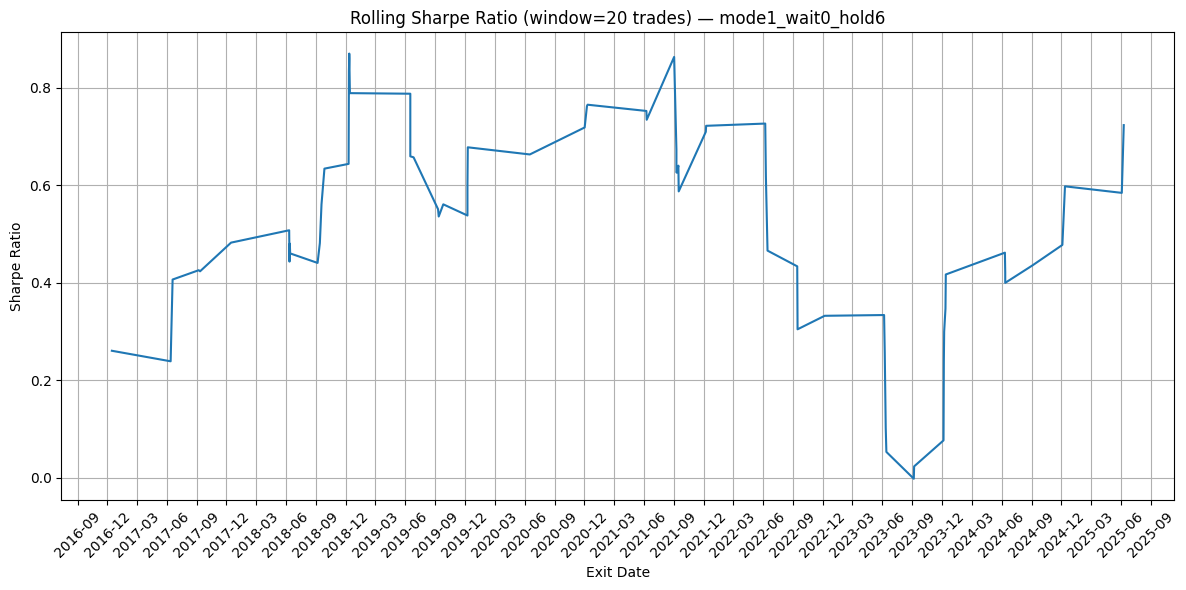

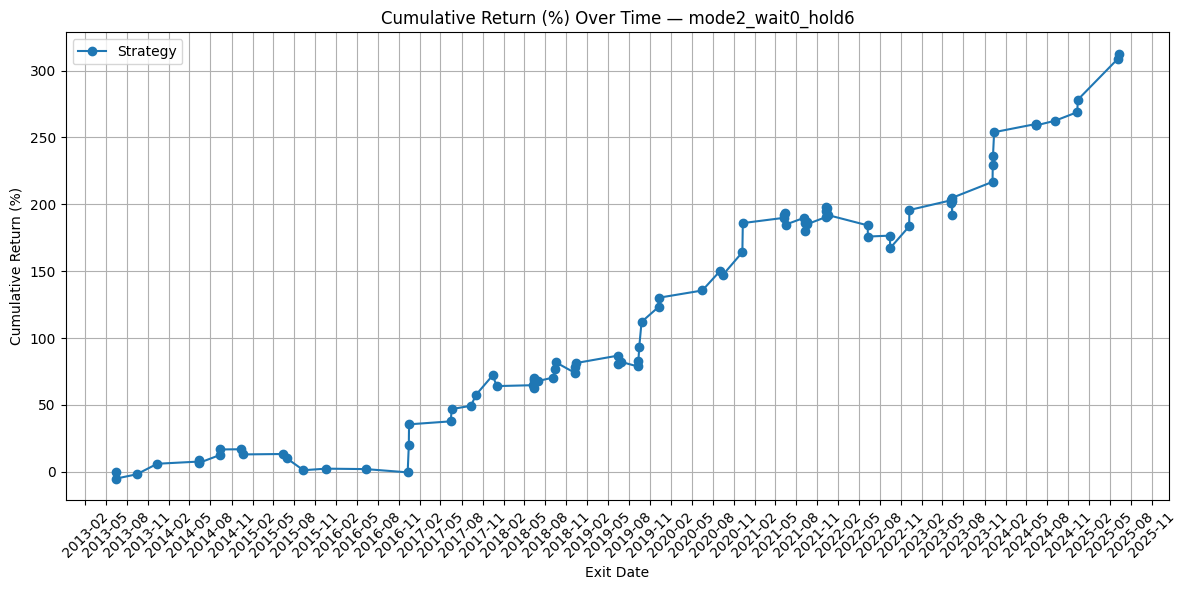

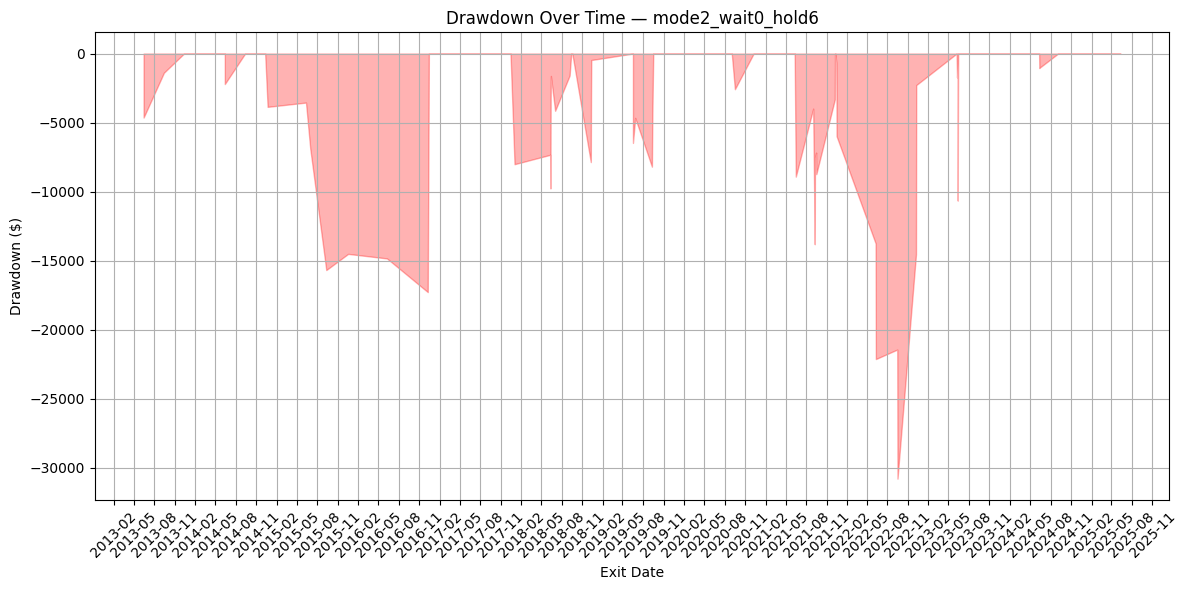

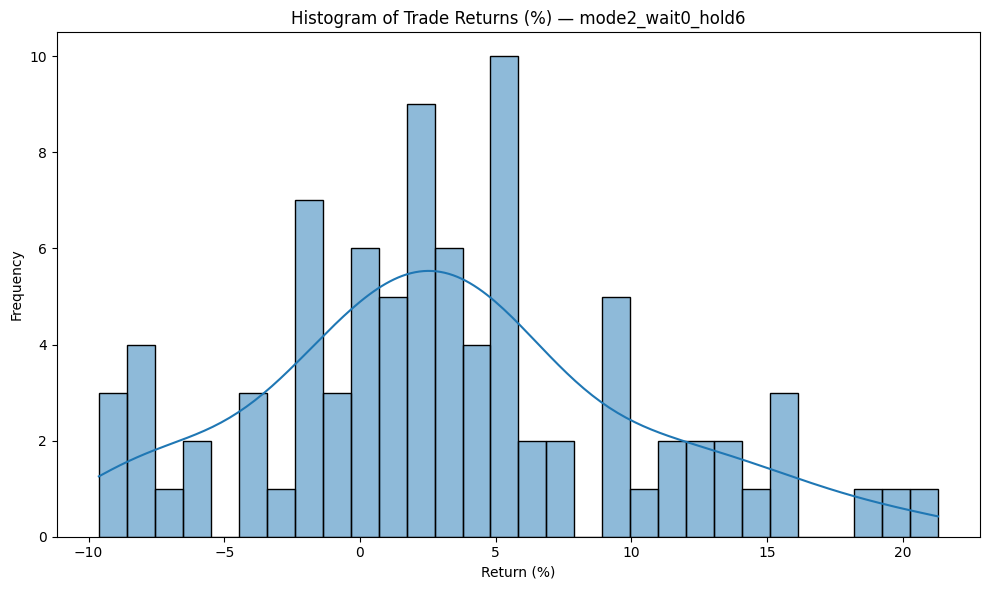

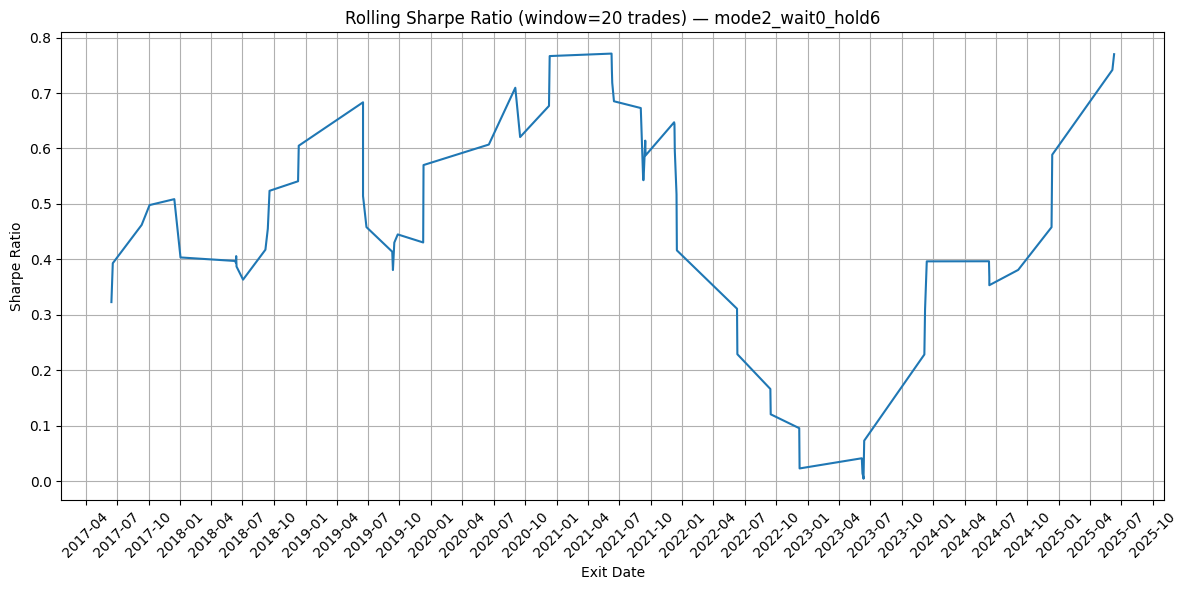

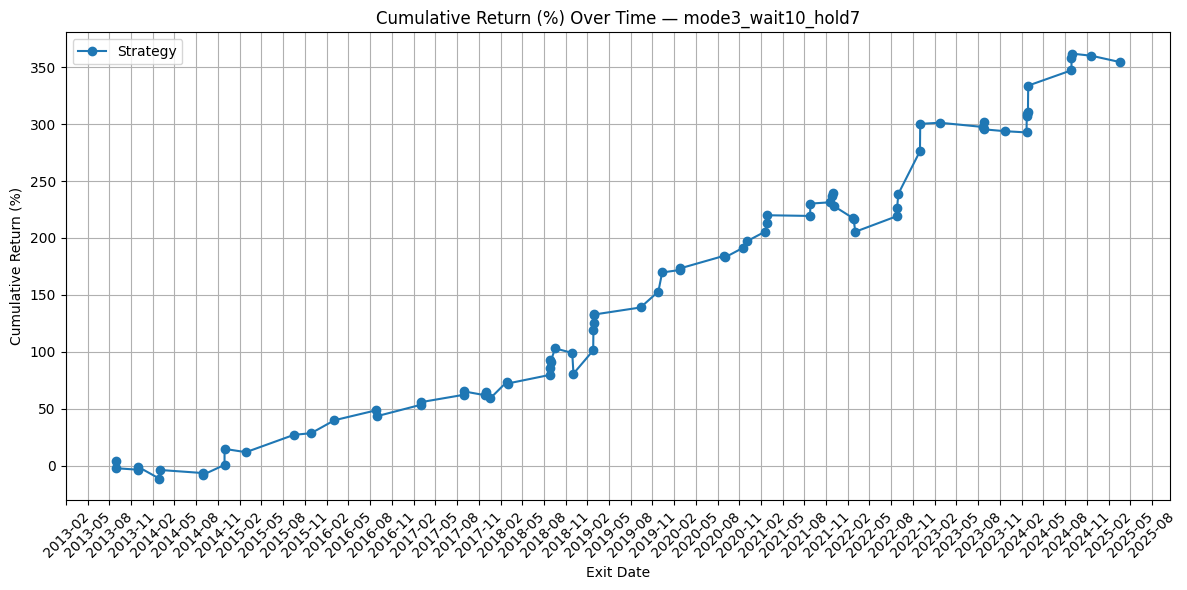

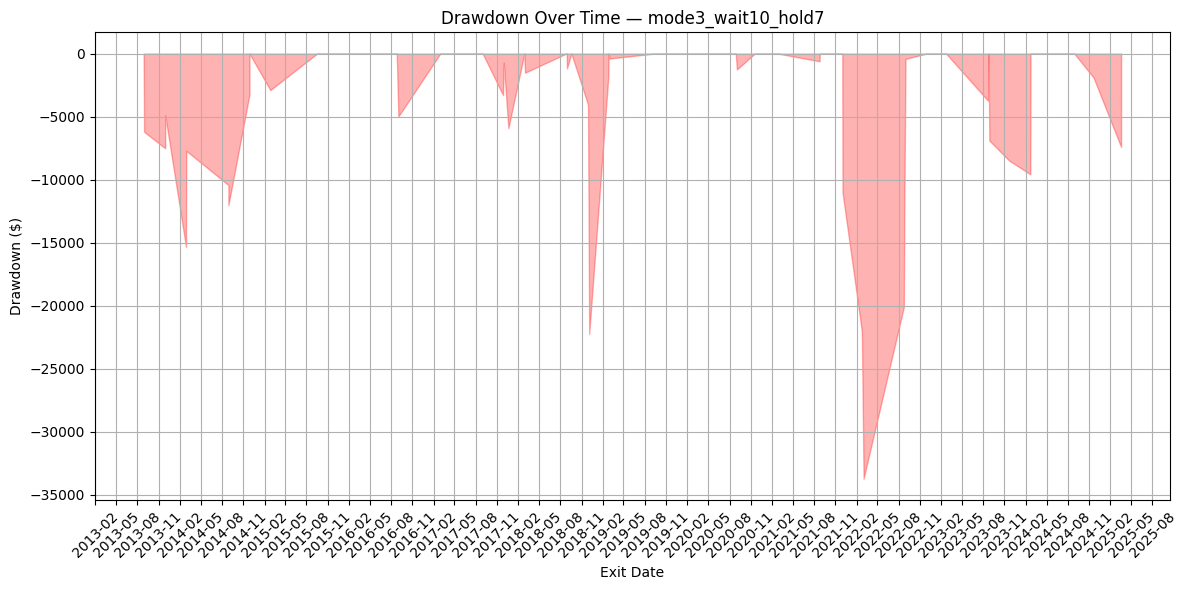

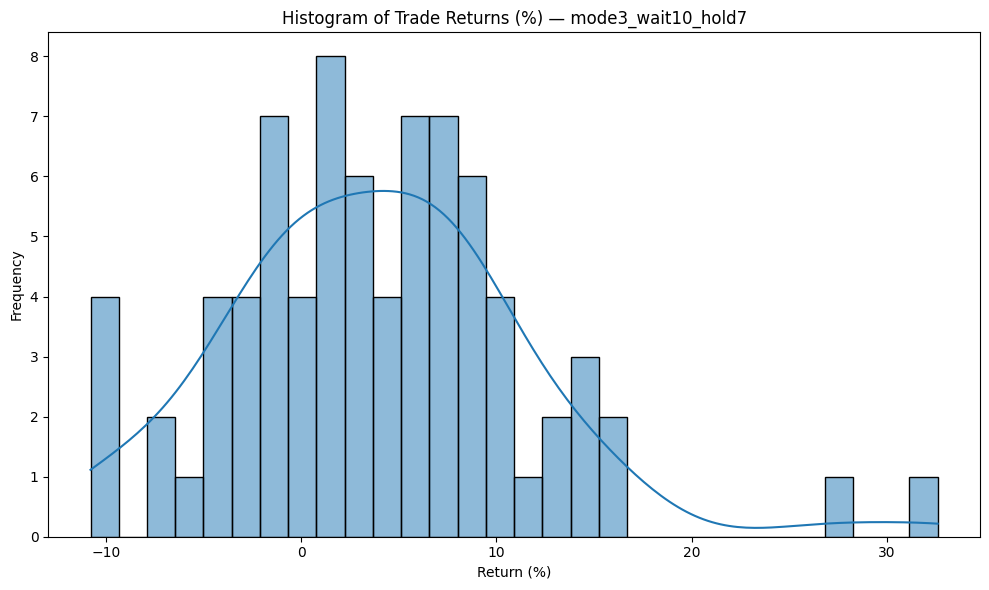

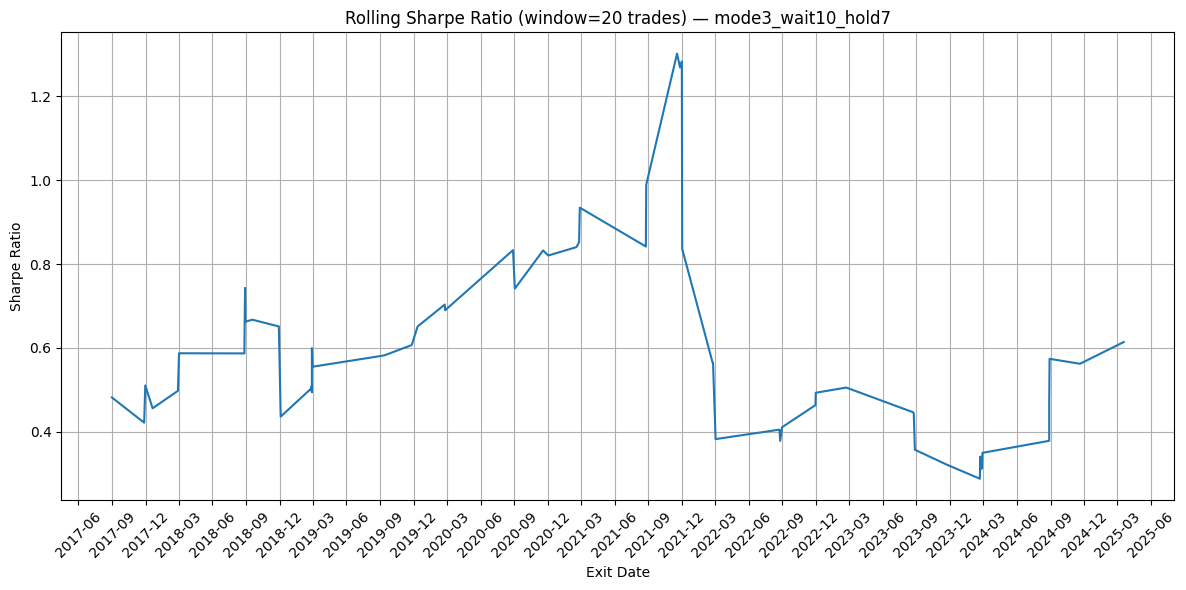


=== Top 10 Configs by sharpe_ratio ===
mode3_wait10_hold7 | sharpe_ratio: 0.5097 | Trades: 78.0 | Win Rate: 66.67%
mode3_wait0_hold6 | sharpe_ratio: 0.4953 | Trades: 88.0 | Win Rate: 68.18%
mode1_wait0_hold6 | sharpe_ratio: 0.4940 | Trades: 87.0 | Win Rate: 70.11%
mode2_wait0_hold6 | sharpe_ratio: 0.4844 | Trades: 87.0 | Win Rate: 70.11%
mode3_wait8_hold9 | sharpe_ratio: 0.4840 | Trades: 76.0 | Win Rate: 76.32%
mode3_wait7_hold10 | sharpe_ratio: 0.4825 | Trades: 75.0 | Win Rate: 70.67%
mode2_wait7_hold10 | sharpe_ratio: 0.4806 | Trades: 73.0 | Win Rate: 69.86%
mode1_wait0_hold5 | sharpe_ratio: 0.4775 | Trades: 84.0 | Win Rate: 67.86%
mode3_wait0_hold5 | sharpe_ratio: 0.4582 | Trades: 85.0 | Win Rate: 63.53%
mode3_wait10_hold9 | sharpe_ratio: 0.4580 | Trades: 85.0 | Win Rate: 65.88%

=== Bottom 10 Configs by sharpe_ratio ===
mode1_wait6_hold2 | sharpe_ratio: -0.1811 | Trades: 83.0 | Win Rate: 37.35%
mode1_wait7_hold1 | sharpe_ratio: -0.1760 | Trades: 79.0 | Win Rate: 44.30%
mode3_wait7

In [5]:
analyze_backtests(tickers, start_date, initial_balance)